# 1. 데이터 수집 및 로드

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('internet_service_churn.csv')


# 2. 데이터 구조 및 변수 이해

In [5]:
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None
(72274, 11)


- 행/열 수 : 72274행 11열
- float 4개, int 7개
- 고유 식별값1개, 이진형 3개, 수치 범주형 2개, 연속형 5개
- 타겟행 : churn


- 컬럼 설명

 0   id                             고유 구독자 ID

 1   is_tv_subscriber               TV 구독 여부

 2   is_movie_package_subscriber	영화 패키지 구독 여부

 3   subscription_age               구독 기간

 4   bill_avg                       지난 3개월 평균 청구 금액

 5   reamining_contract             계약의 남은 연수
 (null 일 경우 계약 x, 계약 기간이 끝나기 전 취소 시 위약금)
 6   service_failure_count          지난 3개월간 서비스 장애로 인한 콜센터 고객 통화 횟수

 7   download_avg                   지난 3개월 인터넷 사용량(GB)

 8   upload_avg                     지난 3개월 평균 업로드(GB)
 The average usage of downloads and uploads over the last three months is within the 3GB limit

 9   download_over_limit            지난 9개월 동안의 "다운로드 제한 초과 횟수"
 제한 초과시 추가 요금 지불해야함.

 10  churn                          서비스 취소 여부

In [ ]:
# todo 8번 항목 데이터 작성자가 3gb라고 해놨는데, 말 안 되는 것 같음.

# 3.데이터 요약 및 통계

In [6]:
print(df.describe())

                 id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.227400e+04      72274.000000                 72274.000000   
mean   8.463182e+05          0.815259                     0.334629   
std    4.891022e+05          0.388090                     0.471864   
min    1.500000e+01          0.000000                     0.000000   
25%    4.222165e+05          1.000000                     0.000000   
50%    8.477840e+05          1.000000                     0.000000   
75%    1.269562e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  reamining_contract  \
count      72274.000000  72274.000000        50702.000000   
mean           2.450051     18.942483            0.716039   
std            2.034990     13.215386            0.697102   
min           -0.020000      0.000000            0.000000   
25%            0.930000     13.000000            0.000000   
50%

구독 기간 최소값이 음수인 것을 확인

# 4.결측치 및 이상치 탐색 , 8. 데이터 전처리

In [8]:
df.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

 - remaining contract 결측치 21572 : dataset에서 null 일 경우 계약이라는 언급이 있었음.

 - download_avg, upload_avg 결측치 381

In [ ]:
# todo 행 삭제가 나을까요..?

In [9]:
# 고유 식별값인 id 컬럼 삭제
df= df.drop('id', axis= 1)

remaining_contract 값이 null인 경우 계약 기간이 남지 않은 경우라고 Dataset에서 언급.
이탈자의 경우 remaining_contract을 0으로 변환하면 되지만,


이탈 하지 않았지만 계약기간이 null인 값은 결측치로 판단.

In [10]:
# churn 0 / 1 양 비교
churn_count = df['churn'] == 1
churn_count.sum()  # 0 (32224)  1 (40050)

np.int64(40050)

In [11]:
# 이탈을 하지 않았지만 계약기간이 null 값인 항목
condition = (df['churn'] == 0) & (df['reamining_contract'].isnull())

# 해당 조건을 만족하는 행의 수 확인   -> 1853
condition_count = condition.sum()
condition_count

np.int64(1853)

### 이상치 확인 & 제거


describe에서 구독기간인 'subscription_age' 항목에서 최소값이 음수인 것을 확인.

In [116]:
# subscription_age 컬럼의 최소값 확인
min_age = df['subscription_age'].min()
print(min_age)


-0.02


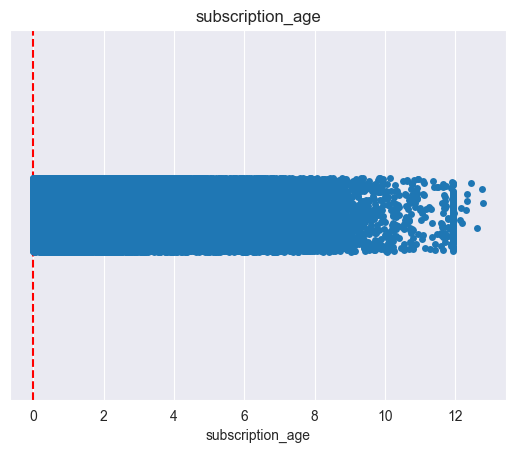

In [12]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.stripplot(x=df['subscription_age'], jitter=True)
plt.axvline(0, color='red', linestyle='--')  # 음수 기준선
plt.title("subscription_age")
plt.show()

수치가 -0.02여서 잘 보이지 않음.. 축 범위를 좁혀서 시각화

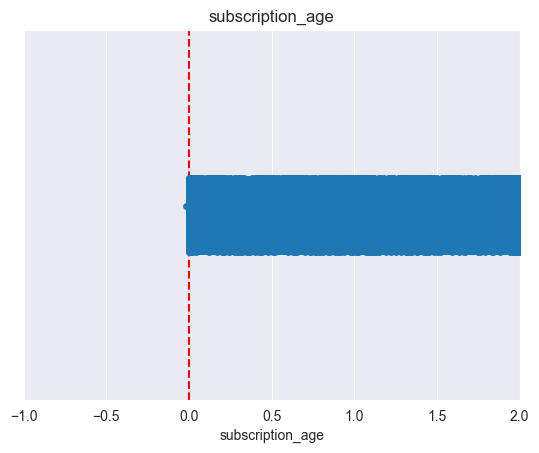

In [13]:
sns.stripplot(x=df['subscription_age'], jitter=True)
plt.axvline(0, color='red', linestyle='--')  # 음수 기준선
plt.title("subscription_age")
plt.xlim(-1, 2)  # 축 범위 좁히기
plt.show()

In [14]:
# 이상치 제거 DataFrame 갱신
df= df[df['subscription_age'] >= 0]

# 이상치 제거 후 행 수 반환 -> 72273
print(df.shape[0])

# subscription_age 컬럼의 최소값 확인 -> 0.0
min_age = df['subscription_age'].min()
print(min_age)

72273
0.0


### 결측치 처리

#### 이탈 x . 잔여 계약 기간  null -> 평균값으로 처리

In [15]:
# remaining contract 평균
mean_remaining_contract = df['reamining_contract'].mean()
mean_remaining_contract
#np.float64(0.7160392094986392)

np.float64(0.7160517544032662)

In [16]:
# 조건을 만족하는 결측치에만 평균값 적용
df.loc[condition, 'reamining_contract'] = mean_remaining_contract
df.isna().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             19719
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [17]:
# 나머지 remaining_contract, dl_avg, ul_avg null 값 0으로 채우기
df = df.fillna(0)
df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

#### 이탈 x . 잔여 계약 기간  null -> 중위값으로 처리

In [98]:
# remaining contract 중위
mid_remaining_contract = df['reamining_contract'].median()
mid_remaining_contract
#np.float64(0.57)

np.float64(0.57)

In [99]:
# 조건을 만족하는 결측치에만 중위값 적용
df.loc[condition, 'reamining_contract'] = mid_remaining_contract
df.isna().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             19719
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [110]:
# null 값 0으로 채우기
df = df.fillna(0)
df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

#### 이탈 x . 잔여 계약 기간  null -> 0으로 처리

In [ ]:
# remaining_contract, dl_avg, ul_avg null 값 0으로 채우기
df = df.fillna(0)
df.isna().sum()

#### 이탈 x . 잔여 계약 기간  null -> 행 제거

In [122]:
# condition 조건에 해당되는 행 제거
df = df[~condition]

In [124]:
# 나머지 remaining_contract, dl_avg, ul_avg null 값 0으로 채우기
# 행 개수 변화 확인 72273 -> 70420
df = df.fillna(0)
print(df.isna().sum())
print(df.info())



is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 70420 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             70420 non-null  int64  
 1   is_movie_package_subscriber  70420 non-null  int64  
 2   subscription_age             70420 non-null  float64
 3   bill_avg                     70420 non-null  int64  
 4   reamining_contract           70420 non-null  float64
 5   service_failure_count        70420 non-null  int64  
 6   download_avg                 70420 non-null  float64
 7   upload_avg                

# 5. 변수 분포 시각화 6. 변수 간 관계 시각화

In [18]:
import seaborn as sns

### 이진형 변수 vs Churn

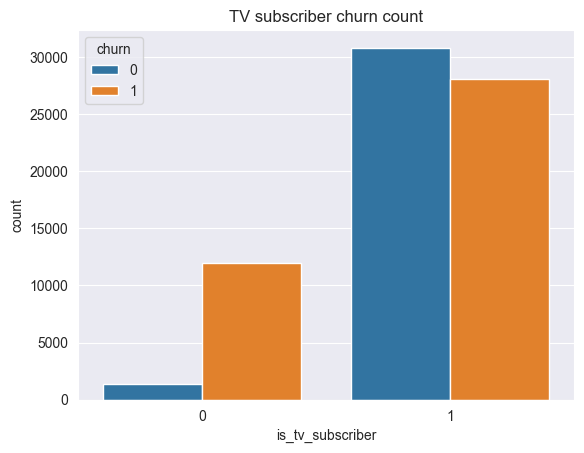

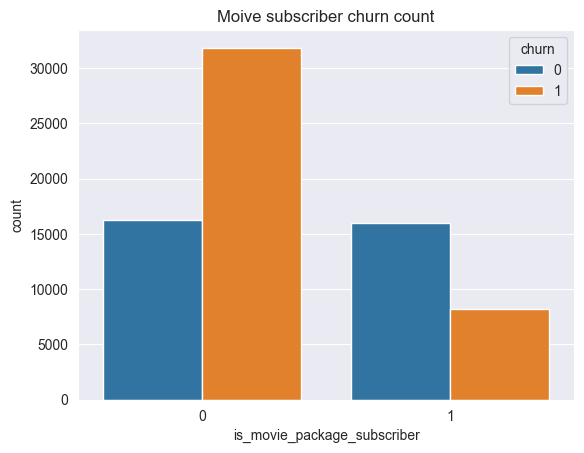

In [19]:
sns.countplot(data=df, x='is_tv_subscriber', hue='churn')
plt.title("TV subscriber churn count")
plt.show()

sns.countplot(data=df, x='is_movie_package_subscriber', hue='churn')
plt.title("Moive subscriber churn count")
plt.show()



TV와 영화 서비스 구독을 안한 사람에서 이탈률이 높음을 확인
영화는 구독자에서 이탈방지가 잘 되는 것을 확인

### 수치 범주형 변수 vs Churn

#### download_over_limit

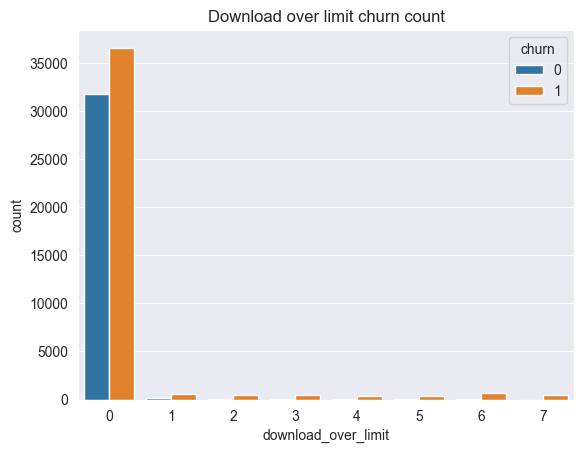

In [20]:
sns.countplot(data=df, x='download_over_limit', hue='churn')
plt.title("Download over limit churn count")
plt.show()

0을 제외한 데이터만 선택 ( 0 데이터양이 너무 많아서 그래프가 잘 안보임.)

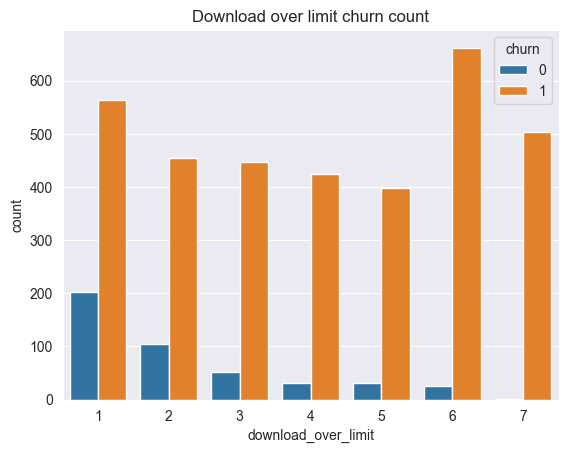

In [21]:
filtered_download_over_limit_df = df[~df['download_over_limit'].isin([0])]

sns.countplot(data=filtered_download_over_limit_df, x='download_over_limit', hue='churn')
plt.title("Download over limit churn count")
plt.show()

다운로드 제한 초과 횟수가 있을 경우 이탈률이 높음을 확인

<Axes: xlabel='service_failure_count', ylabel='count'>

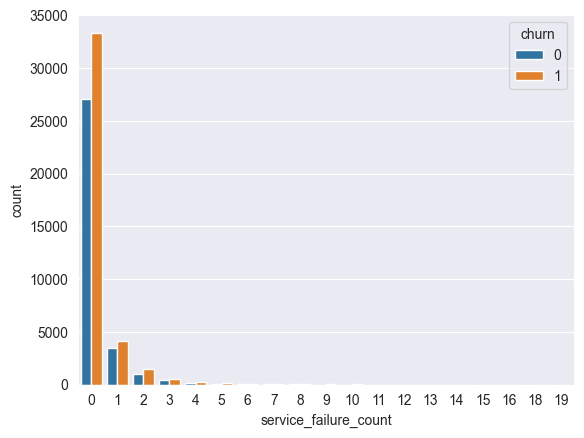

In [22]:
sns.countplot(data = df, x='service_failure_count' ,hue = 'churn')

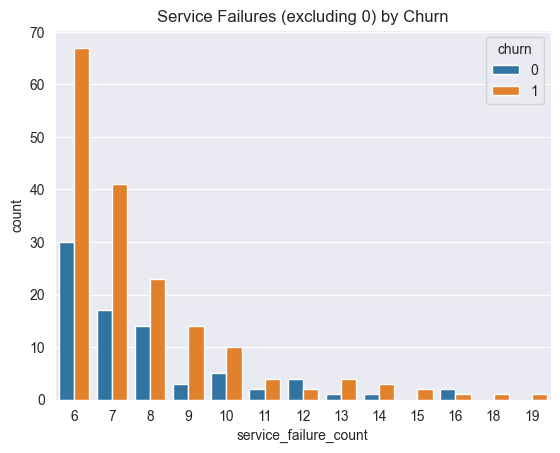

In [23]:
# 0 ~ 5을 제외한 데이터만 선택 ( 0 ~ 5 데이터양이 너무 많아서 그래프가 잘 안보임.)
filtered_service_failure_count_df = df[~df['service_failure_count'].isin([0, 1, 2, 3, 4, 5])]

sns.countplot(data=filtered_service_failure_count_df, x='service_failure_count', hue='churn')
plt.title('Service Failures (excluding 0) by Churn')
plt.show()

### 연속형 변수 vs Churn

#### bill avg violin plot

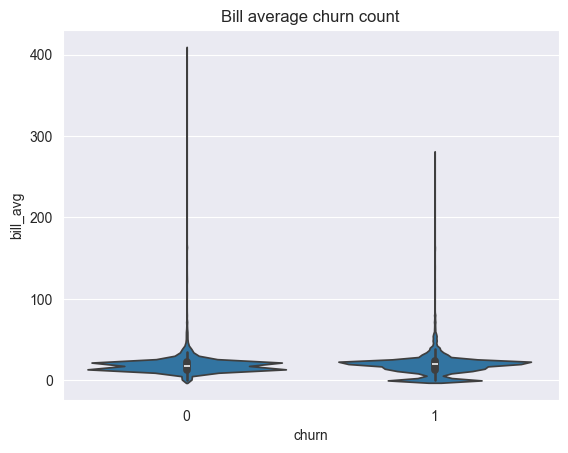

In [24]:
sns.violinplot(data=df, x='churn', y='bill_avg')
plt.title("Bill average churn count")
plt.show()

데이터 값 작은 쪽에 몰려있음

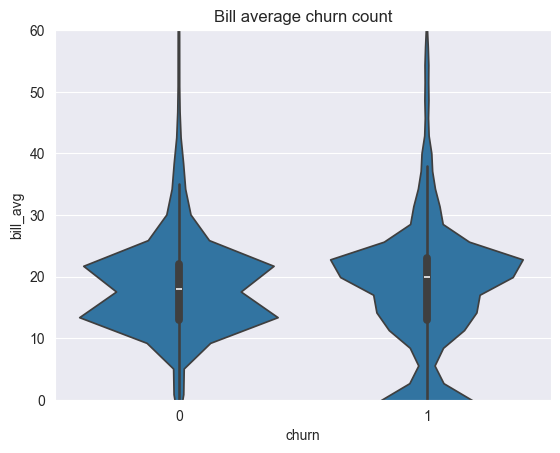

In [25]:
sns.violinplot(data=df, x='churn', y='bill_avg')
plt.title("Bill average churn count")
plt.ylim(0, 60)
plt.show()

이탈률과 큰 양의 상관관계 보이지 않음. 오히려 지불금액 상위에 속한 사람이 이탈을 안한 모습

#### subscribtion age viloin plot

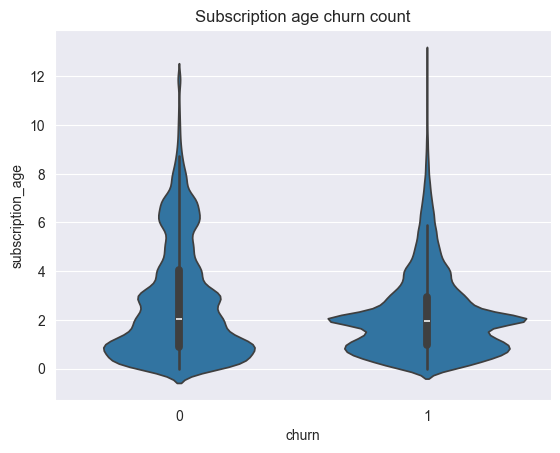

In [26]:

sns.violinplot(data=df, x='churn', y='subscription_age')
plt.title("Subscription age churn count")
plt.show()

이탈 고객이 대부분 구독 기간이 적은 축에 속함

#### remaining contract viloin plot

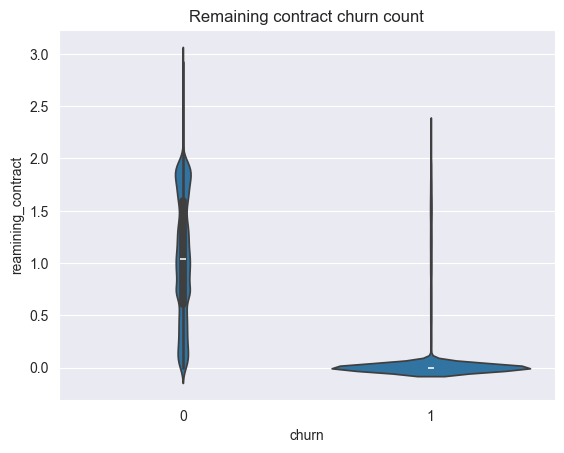

In [27]:

sns.violinplot(data=df, x='churn', y='reamining_contract')
plt.title("Remaining contract churn count")
plt.show()

이탈고객 대부분 계약 기간 연장이 되어있지 않음.

#### download & upload avg. 시각화로 큰 차이 안나서 일단은 ..

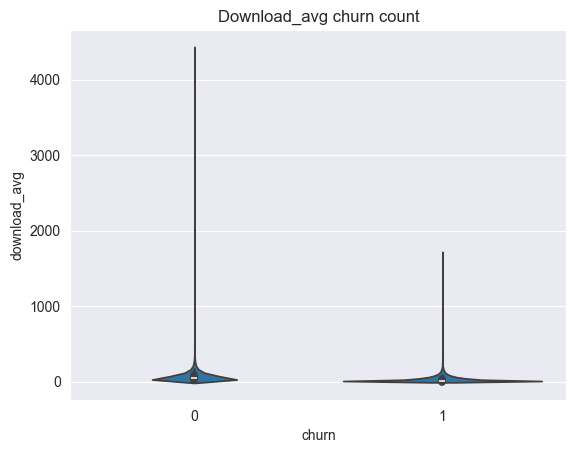

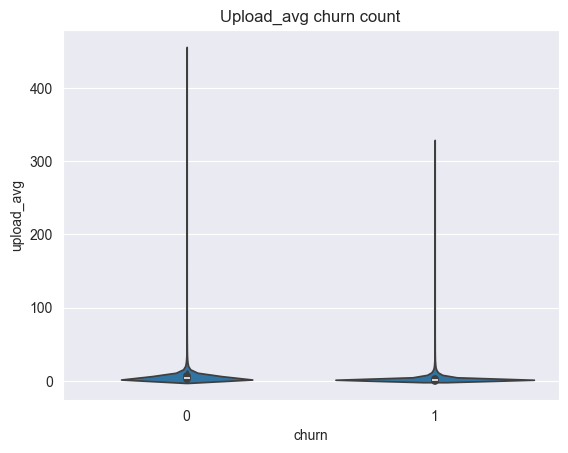

In [28]:
sns.violinplot(data=df, x='churn', y='download_avg')
plt.title("Download_avg churn count")
plt.show()

sns.violinplot(data=df, x='churn', y='upload_avg')
plt.title("Upload_avg churn count")
plt.show()

값이 적은 쪽에 데이터가 많이 몰려있어서 축 제한

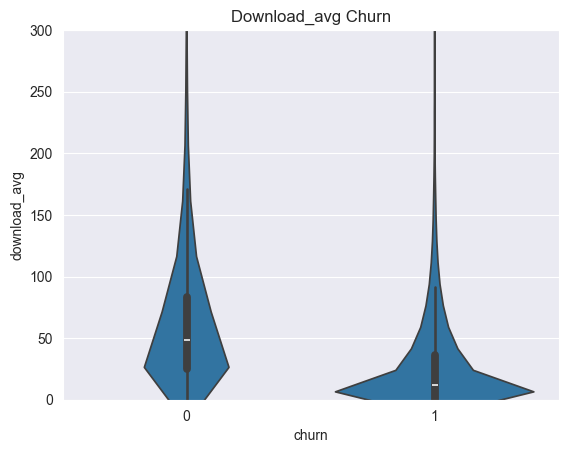

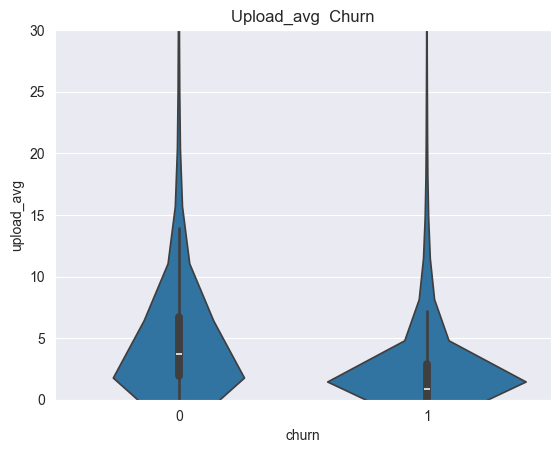

In [29]:
sns.violinplot(data=df, x='churn', y='download_avg')
plt.title("Download_avg Churn")
plt.ylim(0, 300)
plt.show()

sns.violinplot(data=df, x='churn', y='upload_avg')
plt.title("Upload_avg  Churn")
plt.ylim(0, 30)
plt.show()

둘 다 이탈고객 대부분이 사용량이 거의 없음.

### 컬럼을 묶어 시각화

In [ ]:
# todo 이쪽은 시각화가 별로인 것 같아서 날려버려도 될 것 같습니다....

#### Service_failure_count , remaining_contract 묶어서 scatterplot으로 확인

<Axes: xlabel='service_failure_count', ylabel='reamining_contract'>

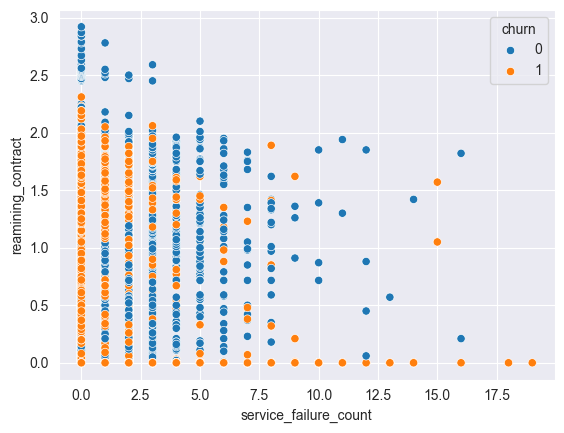

In [30]:
sns.scatterplot(data=df, x='service_failure_count', y ='reamining_contract', hue='churn')

service_failure_count & remaining_contract -> 몰려있어서 생각보다 잘 안 보임

service_failure_count 0의 이탈률이 너무 많게 보임.

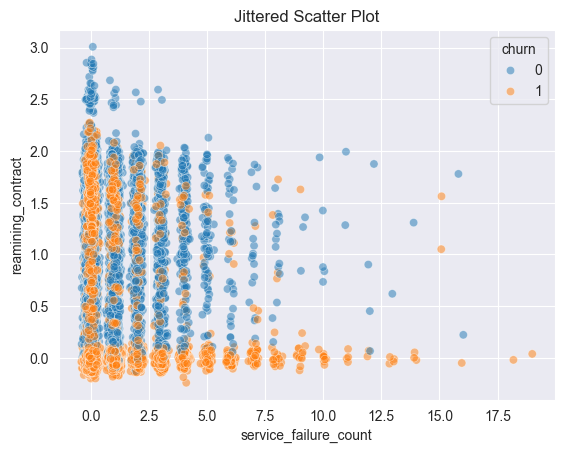

In [31]:
import numpy as np
# 약간의 노이즈를 추가해서 퍼트리고 투명도 추가
df_jittered = df.copy()
df_jittered['service_failure_count'] += np.random.normal(0, 0.1, size=len(df))
df_jittered['reamining_contract'] += np.random.normal(0, 0.05, size=len(df))

sns.scatterplot(data=df_jittered, x='service_failure_count', y='reamining_contract', hue='churn', alpha=0.5)
plt.title("Jittered Scatter Plot")
plt.show()


remaining contract 가 남아있고, service_failure_count가 적은 사람들이 이탈률이 적음

#### download_avg, upload_avg, download_over_limit 묶어서 시각화

<Axes: xlabel='download_avg', ylabel='upload_avg'>

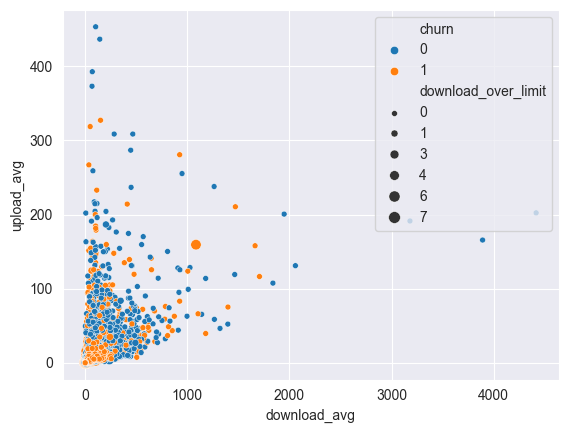

In [32]:
sns.scatterplot(data = df, x = 'download_avg', y = 'upload_avg', hue = 'churn', size= 'download_over_limit')

데이터가 x축인 download_avg 1000, y축인 upload_avg 200 안에 많이 모여있어서 잘 나타나지 않는 것 같음

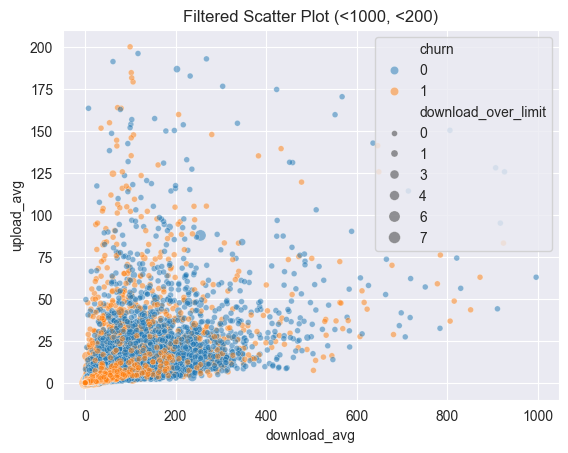

In [33]:
filtered_df = df[(df['download_avg'] < 1000) & (df['upload_avg'] < 200)]

sns.scatterplot(data=filtered_df, x='download_avg', y='upload_avg', hue='churn', size='download_over_limit', alpha=0.5)
plt.title("Filtered Scatter Plot (<1000, <200)")
plt.show()

upload와 download 모두 없거나 적은 회원의 이탈이 몰려있음.

download  ~ 400정도 구간의 회원 이탈률이 낮은 경향

# 07.상관관계 및 교차분석

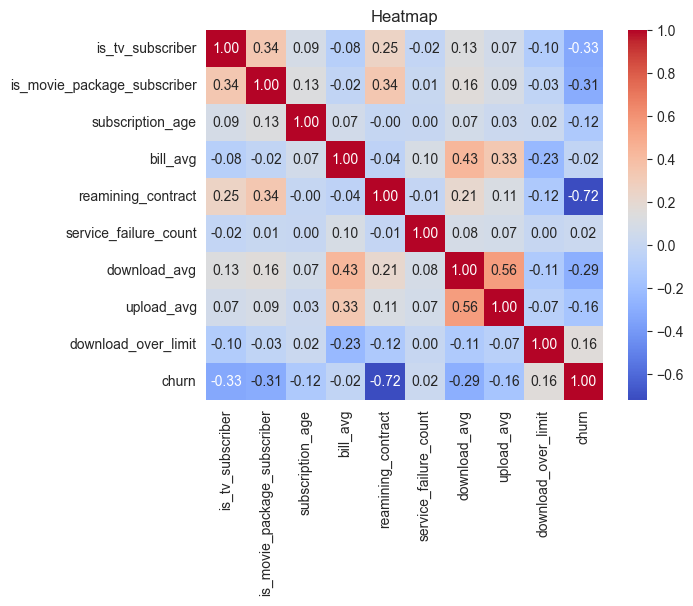

In [34]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.show()

#### 상관관계가 있는 주요 특성

- target인 churn과 양의 상관관계 : remaining_contract(0.72), download_over_limit(0.16)

- target인 churn과 음의 상관관계 : is_tv_subscriber(-0.33), is_movie_package_subscriber(-0.31), download_avg(-0.29), upload_avg(-0.16) subscription_age(-0.12)

In [ ]:
# todo 저는 결측치 처리 remaining_contract 평균값 적용 or 행 제거가 괜찮은 것 같습니다

# 9. Feature Engineering

In [ ]:
# 필요시 만들거나 스케일링 진행하겠습니당
# 아이디어 있으시면 디엠 주세용

# 10. 최종 요약 및 인사이트 도출

## 데이터 요약 및 인사이트

- is_movie_package_subscriber & is_tv_subscriber =1인 고객의 이탈률이 상대적으로 낮음 → 부가서비스 제공이 이탈 방지에 효과적일 수 있음

- reamining_contract가 있을 때 이탈률이 낮음 -> 계약기간 도중 해약 시 패널티가 있는 현 제도가 계약 유지에 효과적으로 작용하고 있음

- download_avg 와 이탈률의 음의 상관관계 -> 데이터 사용량이 이탈 방지에 작용

### 향후 분석/모델링 방향
- 예측 모델링(분류): churn 예측용 분류모델 구축

- 군집 분석: 고객 세분화를 통한 타겟

- 서비스 품질 지표 강화: remaining_contract, is_tv_subscriber, is_movie_package_subscriber 등과 이탈 연관성 모델링 강화

## 이탈률 감소 대책

### 1. TV & 영화 번들 서비스 유도
분석 근거: is_tv_subscriber, is_movie_package_subscriber가 이탈률 감소에 유의미

대책:

- TV/영화 패키지 결합 시 할인 제공

- 신규 고객 대상 무료 체험 제공

- “TV+인터넷”, “영화+인터넷” 식의 번들 패키지 강화



### 2. 계약 유도 전략
분석 근거: reamining_contract가 있을 때 이탈률이 낮음

대책:

- 무계약 고객 대상으로 장기 계약 유도 + 사은품/할인 제공

- 계약 기간 만료 직전 자동 리마인드 및 재계약 유도

- 계약 종료 예정자 대상 맞춤 마케팅